# Homework 2, Part 2, Task 3 - Predict House Price Ranges - Classification

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Load the training and testing datasets
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [4]:
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")
data_test_y = pd.read_csv("test_y.csv")
data_test['SalePrice']=data_test_y['SalePrice']
data_train['train']=1
data_test['train']=0
data = pd.concat([data_train, data_test], axis=0)
print('data_train.shape', data_train.shape)
print('data_test.shape', data_test.shape)
print('data.shape', data.shape)

data_train.shape (1460, 82)
data_test.shape (1459, 82)
data.shape (2919, 82)


In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1


the regression target is SalePrice

In [6]:
data.head().SalePrice

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

## Handle missing values (NaN and None)
show the missing values for each feature

In [7]:
#show the missing values in a table
Missing = pd.concat([data_train.isnull().sum(), data_test.isnull().sum()], axis=1, keys=['Train', 'Test'])
Missing[Missing.sum(axis=1) > 0]

,Train,Test
MSZoning,0,4
LotFrontage,259,227
Alley,1369,1352
Utilities,0,2
Exterior1st,0,1
Exterior2nd,0,1
MasVnrType,8,16
MasVnrArea,8,15
BsmtQual,37,44
BsmtCond,37,45


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


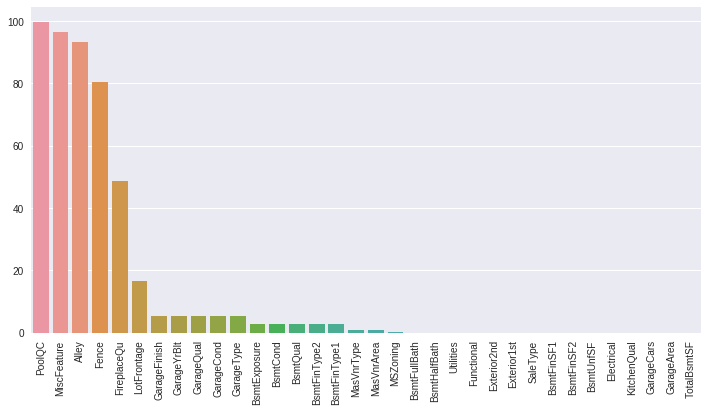

In [8]:
#show the missing values in a plot
data_missing = (data.isnull().sum(axis=0)/data.shape[0]) * 100
data_missing = data_missing.drop(data_missing[data_missing == 0].index).sort_values(ascending=False)
plt.figure(figsize=(12, 6))
plt.xticks(rotation="90")
sns.barplot(x=data_missing.index, y=data_missing)

From the figure, we see that nearly 100% values of the feature/column 'PoolQC' are missing <br>
We can simply delete these features (drop these columns from the table) of which >=50% values are missing

In [9]:
feature_drop = data_missing[data_missing >=50].index
feature_drop

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')

In [0]:
#drop the columns
data=data.drop(columns=feature_drop)
#drop Id
data=data.drop(columns='Id')

In [11]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500.0,1
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500.0,1
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500.0,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000.0,1
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000.0,1


For those features with < 50% missing values, we can use impute method. <br>
Missing numerical values can be imputed with a constant value, or some statistics (mean, median or most frequent) of each column in which the missing values are located. <br>
Missing categorical/non-numeric values can be imputed with the most frequent category, or a new category-'nothing'

In [0]:
numerical_column=[]
categorical_column=[]
for c in data.columns:
    v=data[c]
    v=v[~v.isnull()]
    if data[c].dtype == np.dtype('O'): # non-numeric values       
        #data[c]=data[c].fillna(v.value_counts().index[0]) # the most frequent category
        data[c]=data[c].fillna('nothing') # a new category         
        categorical_column.append(c)
    else: # numeric 
        if c != 'train' and c != 'SalePrice':
            data[c]=data[c].fillna(v.median()) 
        numerical_column.append(c)        

check if there is any missing value

In [13]:
data[data.isnull().any(axis=1)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train


convert categorical values to numerical values using one-hot encoding <br>
note: there are other methods to encode categorical values

In [14]:
data=pd.get_dummies(data, columns=categorical_column)
data.shape

(2919, 296)

In [15]:
#the table has many new columns
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_nothing,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,0,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,0,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,0,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,0,0,0,0,0,1,0


### get training data and testing data from `data`

In [0]:
data_train = data[data['train']==1]
X_train=data_train.drop(columns=['SalePrice', 'train']).values
Y_train=data_train['SalePrice'].values

In [17]:
X_train.dtype

dtype('float64')

In [18]:
X_train.shape

(1460, 294)

In [19]:
Y_train.dtype

dtype('float64')

In [0]:
data_test = data[data['train']==0]
X_test=data_test.drop(columns=['SalePrice', 'train']).values
Y_test=data_test['SalePrice'].values

show the distribution of SalePrice

Text(0.5, 1.0, 'histogram of SalePrice in training set')

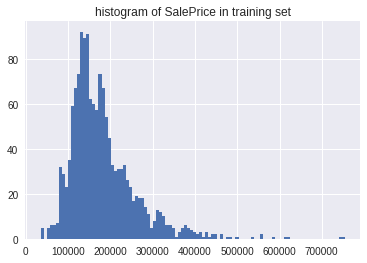

In [21]:
_=plt.hist(data_train.SalePrice.values, bins=100)
plt.title('histogram of SalePrice in training set')

Text(0.5, 1.0, 'histogram of SalePrice in testing set')

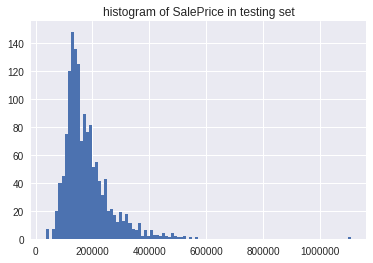

In [22]:
_=plt.hist(data_test.SalePrice.values, bins=100)
plt.title('histogram of SalePrice in testing set')

### A house is expensive if SalePrice > 163000 (median price in the training set)
### A house is affordable if SalePrice <= 163000
### Now, we have a classification problem: affordable (label 0) vs expensive (label 1)

In [23]:
np.median(Y_train)

163000.0

In [0]:
#make new labels
t=np.median(Y_train)
Y_train_old = Y_train.copy()
Y_train[Y_train_old<=t]=0
Y_train[Y_train_old>t]=1
#
Y_test_old = Y_test.copy()
Y_test[Y_test_old<=t]=0
Y_test[Y_test_old>t]=1

### Classification:  affordable vs expensive using a linear classifier  - logistic regression
note: you could try linear SVM, but it is very slow...

In [25]:
from sklearn.linear_model import LogisticRegression
linear_model = LogisticRegression()
linear_model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

show the training accuracy

In [26]:
linear_model.score(X_train, Y_train)

0.9465753424657535

show the testing  accuracy

In [27]:
linear_model.score(X_test, Y_test)

0.9636737491432488

### Classification: affordable vs expensive using nonlinear classifiers
Try the two types of models in the list:  <br>
(1) KNN (hyperparameter is n_neighbors) <br>
(2) random forest  <br>
    It has many hyperparameters.  <br>
    You can just focus on max_depth, and set n_estimators to 100  <br>
    
The requirements are the same as those in HW2_P2_T2.ipynb     <br>

Note: remove `scoring=my_scorer` in cross_val_score(my_model, X_train, Y_train, cv=10, n_jobs=4) <br>

You will get Bonus points (additional 10 points) if you install and try XGBoost <br>
use XGBClassifier from xgboost.sklearn <br>

#### KNeighborsClassifier

11


Text(0, 0.5, 'MAPE')

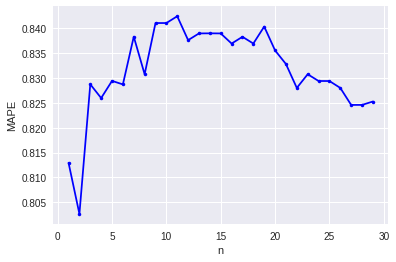

In [28]:
# write your code here - find the optimal hyperparameter n_neighbors
# a for loop to do grid search or use GridSearchCV
# try n_list=np.arange(1,30,1)
# plot the curve: accuracy as a function of n_neighbors 

from sklearn.neighbors import KNeighborsClassifier

MAPE_average_list=[]
n_list=np.arange(1,30,1)
for n in n_list:
    my_model=KNeighborsClassifier(n_neighbors=n)
    MAPE_array = cross_val_score(my_model, X_train, Y_train, cv=10, n_jobs=4)
    MAPE_average_list.append(MAPE_array.mean())
MAPE_average_list=np.array(MAPE_average_list)
#hyperparameter_best = hyperparameter_list[np.argmin(MAPE_average_list)]
n_best = n_list[np.argmax(MAPE_average_list)]
print(n_best)
#or hyperparameter_best is the point at which the curve hyperparameter~MAPE becomes flat 
plt.plot(n_list, MAPE_average_list, '.-b')
plt.xlabel('n')
plt.ylabel('MAPE') 

build a KNeighborsClassifier using the best hyperparameter and fit it to the training data

In [29]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=11, p=2,
           weights='uniform')

show the training accuracy

In [30]:
# write your code here
knn_model.predict(X_train)
knn_model.score(X_train, Y_train)

0.8636986301369863

show the testing accuracy

In [31]:
# write your code here
knn_model.score(X_test, Y_test)

0.8526387936943112

#### RandomForestClassifier

30


Text(0, 0.5, 'MAPE')

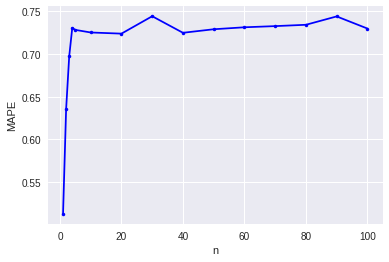

In [32]:
# write your code here - find the optimal hyperparameter max_depth
# try depth_list=np.array([1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
# plot the curve: accuracy as a function of max_depth 
from sklearn.ensemble import RandomForestRegressor

MAPE_average_list=[]
n_list=np.array([1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
for n in n_list:
    my_model=RandomForestRegressor(max_depth = n)
    MAPE_array = cross_val_score(my_model, X_train, Y_train, cv=10,  n_jobs=4)
    MAPE_average_list.append(MAPE_array.mean())
MAPE_average_list=np.array(MAPE_average_list)
#hyperparameter_best = hyperparameter_list[np.argmin(MAPE_average_list)]
n_best = n_list[np.argmax(MAPE_average_list)]
print(n_best)
#or hyperparameter_best is the point at which the curve hyperparameter~MAPE becomes flat 
plt.plot(n_list, MAPE_average_list, '.-b')
plt.xlabel('n')
plt.ylabel('MAPE') 

build a RandomForestClassifier using the best hyperparameter and fit it to the training data

In [33]:
# write your code here
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(max_depth = n_best) # n_best is from the cell above
RFmodel.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

show the training accuracy

In [34]:
# write your code here
RFmodel.score(X_train, Y_train)

0.9972602739726028

show the testing accuracy

In [35]:
# write your code here
RFmodel.score(X_test, Y_test)

0.9307745030843043

#### XGBClassifier

In [0]:
from xgboost import XGBRegressor

4


Text(0, 0.5, 'accuracy')

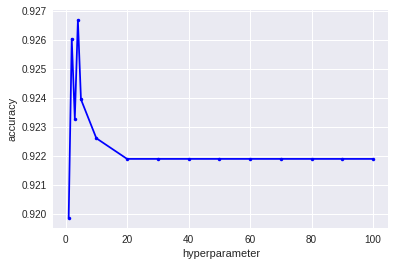

In [38]:
# write your code here - find the optimal hyperparameter max_depth
# try depth_list=np.array([1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
# plot the curve: accuracy as a function of max_depth 
from xgboost import XGBClassifier
accuracy_average_list=[]
hyperparameter_list = np.array([1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
for hyperparameter in hyperparameter_list:
    my_model = XGBClassifier(max_depth = hyperparameter)
    accuracy_array = cross_val_score(my_model, X_train, Y_train, cv=10, n_jobs=4)
    accuracy_average_list.append(accuracy_array.mean())
accuracy_average_list = np.array(accuracy_average_list)
# hyperparameter_best = hyperparameter_list[np.argmin(accuracy_average_list)]
# or hyperparameter_best is the point at which the curve hyperparameter~accuracy becomes flat 
hyperparameter_best = hyperparameter_list[np.argmax(accuracy_average_list)]
print(hyperparameter_best)
plt.plot(hyperparameter_list, accuracy_average_list, '.-b')
plt.xlabel('hyperparameter')
plt.ylabel('accuracy')

build a XGBClassifier using the best hyperparameter and fit it to the training data

In [39]:
#write your code here
xgb_model = XGBClassifier(max_depth = hyperparameter_best) # n_best is from the cell above
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

show the training accuracy

In [40]:
#write your code here
xgb_model.score(X_train, Y_train)

0.9931506849315068

show the testing accuracy

In [41]:
#write your code here
xgb_model.score(X_test, Y_test)

0.9575051405071967

Discussion: <br>
(1) sometimes, a linear model may be just fine. <br>
(2) the nonlinear models have many hyperparameters.<br>
The performance could be improved if we search the entire hyperparameter space.